In [1]:
import os
os.chdir('..')

from util import CONFIG
CONFIG.set_use_mpl_tables(True)

### Chapter 5 examples with Qiskit

In this notebook, we run the example circuits from chapter 5 using the Qiskit simulator backend __[`statevector_simulator`](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.StatevectorSimulator.html)__.

We add the `run` function below to the Qiskit `QuantumCircuit` class to run circuits on the Qiskit statevector simulator.

In [2]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, transpile

def run(self):
    backend = qiskit.Aer.get_backend('statevector_simulator')
    circ = transpile(self, backend)
    job = backend.run(circ)
    state = job.result().get_statevector()
    return state

setattr(QuantumCircuit, 'run', run)

#### Section 5.1.2

Circuit for encoding a real valued sinusoids state (listing 5.1):

In [3]:
from math import pi

def real_valued_sinusoids(n, v):
    N = 2**n
    theta = v*2*pi/N

    q = QuantumRegister(n)
    a = QuantumRegister(1)
    qc = QuantumCircuit(q, a) # ancilla is last qubit

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.cry(2**(j+1)*theta, q[j], a[0])

    return qc

In [4]:
qc = real_valued_sinusoids(3, 1.7)
state = qc.run()

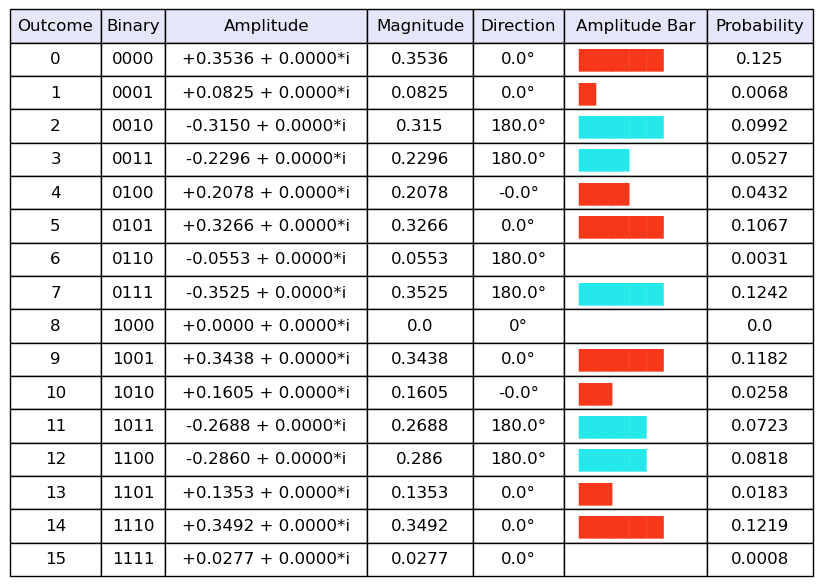

In [5]:
from util import show_state_table

show_state_table(state)

Circuit for encoding a geometric sequence state (listing 5.3):

In [6]:
def geometric_sequence_circuit(n, v):
    theta = v*2*pi/2**n

    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.p(2 ** j * theta, q[j])

    return qc

In [7]:
n = 3
v = 1.7
qc = geometric_sequence_circuit(n, v)
state = qc.run()

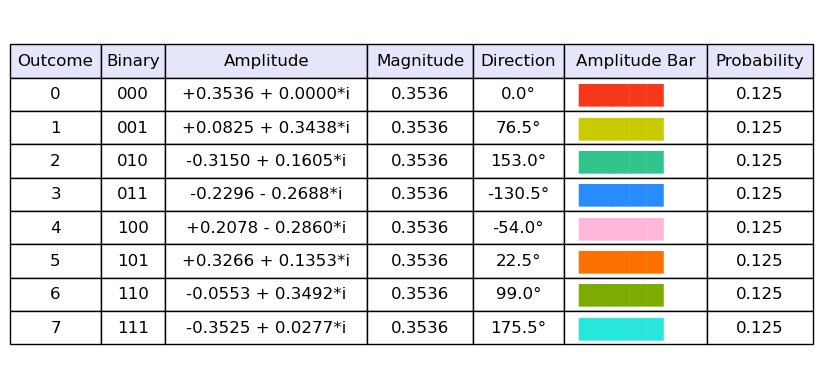

In [8]:
show_state_table(state)